In [1]:
from plot_utils.custom_plot_horizontal_bars_001 import *
import polars as pl
from schema import *
from dateutil.relativedelta import relativedelta

operations = pl.read_parquet("operations.parquet").sort(datetime_cn).with_columns(
    pl.col(debt_cn).cast(pl.Float64),
)
print(list(zip(operations.columns, operations.dtypes)))
operations.with_row_index()

[('datetime', Datetime(time_unit='us', time_zone=None)), ('amount', Float64), ('description', String), ('debt', Float64), ('ope_source', String), ('ope_type', String)]


index,datetime,amount,description,debt,ope_source,ope_type
u32,datetime[μs],f64,str,f64,str,str
0,2025-01-13 00:00:00,20000.0,"""Credit card 1243""",232462.93,"""loan""","""down payment"""
1,2025-01-13 00:00:00,34500.0,"""Bank transfer""",232462.93,"""loan""","""down payment"""
2,2025-02-20 00:00:00,-399.0,"""Tapetes uso rudo""",232462.93,"""busyness""","""equipment"""
3,2025-03-01 00:00:00,-898.1,null,232462.93,"""loan""","""monthly_car_interest_payment"""
4,2025-03-01 00:00:00,-103.16,null,232462.93,"""loan""","""monthly_car_loan_taxes"""
…,…,…,…,…,…,…
16,2025-03-15 00:00:00,-6.09,null,232462.93,"""loan""","""monthly_life_insurance_loan_ta…"
17,2025-03-15 00:00:00,-153.54,null,232462.93,"""loan""","""monthly_life_insurance_interes…"
18,2025-03-15 00:00:00,-1140.39,null,232462.93,"""loan""","""monthly_life_insurance_capital…"


In [2]:
# # operations[2, amount_cn] = -399
# # operations[19, datetime_cn] = datetime(year=2025, month=3, day=4)
# operations[20, amount_cn] = abs(operations[20, amount_cn])
# operations.sort(datetime_cn).write_parquet("operations.parquet")

In [3]:
# from datetime import datetime
# from schema import *
#
# debt = 232462.93
# operations[0, debt_cn] = debt
# operations[1, debt_cn] = debt
# operations[2, debt_cn] = debt
# operations[2, amount_cn] = -500
#
# pl.concat([operations, pl.DataFrame([
#     {
#         datetime_cn: datetime(year=2025, month=3, day=1),
#         amount_cn: -898.1,
#         description_cn: None,
#         debt_cn: debt,
#         ope_source_cn: ope_source_loan_cv,
#         ope_type_cn: monthly_car_interest_payment_cv,
#     },
#     {
#         datetime_cn: datetime(year=2025, month=3, day=1),
#         amount_cn: -103.16,
#         description_cn: None,
#         debt_cn: debt,
#         ope_source_cn: ope_source_loan_cv,
#         ope_type_cn: monthly_car_loan_taxes_cv,
#     },
#     {
#         datetime_cn: datetime(year=2025, month=3, day=1),
#         amount_cn: -17.57,
#         description_cn: None,
#         debt_cn: debt,
#         ope_source_cn: ope_source_loan_cv,
#         ope_type_cn: monthly_life_insurance_interest_payment_cv,
#     },
#     {
#         datetime_cn: datetime(year=2025, month=3, day=1),
#         amount_cn: -2.02,
#         description_cn: None,
#         debt_cn: debt,
#         ope_source_cn: ope_source_loan_cv,
#         ope_type_cn: monthly_life_insurance_loan_taxes_cv,
#     },
#     {
#         datetime_cn: datetime(year=2025, month=3, day=1),
#         amount_cn: -60.32,
#         description_cn: None,
#         debt_cn: debt,
#         ope_source_cn: ope_source_loan_cv,
#         ope_type_cn: monthly_car_insurance_interest_payment_cv,
#     },
#     {
#         datetime_cn: datetime(year=2025, month=3, day=1),
#         amount_cn: -6.93,
#         description_cn: None,
#         debt_cn: debt,
#         ope_source_cn: ope_source_loan_cv,
#         ope_type_cn: monthly_car_insurance_loan_taxes_cv,
#     },
#
#     {
#         datetime_cn: datetime(year=2025, month=3, day=15),
#         amount_cn: -2286.07,
#         description_cn: None,
#         debt_cn: debt,
#         ope_source_cn: ope_source_loan_cv,
#         ope_type_cn: monthly_car_interest_payment_cv,
#     },
#     {
#         datetime_cn: datetime(year=2025, month=3, day=15),
#         amount_cn: 2697.32,
#         description_cn: None,
#         debt_cn: debt,
#         ope_source_cn: ope_source_loan_cv,
#         ope_type_cn: monthly_car_capital_repayment_cv,
#     },
#     {
#         datetime_cn: datetime(year=2025, month=3, day=15),
#         amount_cn: -272.33,
#         description_cn: None,
#         debt_cn: debt,
#         ope_source_cn: ope_source_loan_cv,
#         ope_type_cn: monthly_car_loan_taxes_cv,
#     },
#     {
#         datetime_cn: datetime(year=2025, month=3, day=15),
#         amount_cn: -44.72,
#         description_cn: None,
#         debt_cn: debt,
#         ope_source_cn: ope_source_loan_cv,
#         ope_type_cn: monthly_life_insurance_interest_payment_cv,
#     },
#     {
#         datetime_cn: datetime(year=2025, month=3, day=15),
#         amount_cn: -52.76,
#         description_cn: None,
#         debt_cn: debt,
#         ope_source_cn: ope_source_loan_cv,
#         ope_type_cn: monthly_life_insurance_capital_repayment_cv,
#     },
#     {
#         datetime_cn: datetime(year=2025, month=3, day=15),
#         amount_cn: -6.09,
#         description_cn: None,
#         debt_cn: debt,
#         ope_source_cn: ope_source_loan_cv,
#         ope_type_cn: monthly_life_insurance_loan_taxes_cv,
#     },
#     {
#         datetime_cn: datetime(year=2025, month=3, day=15),
#         amount_cn: -153.54,
#         description_cn: None,
#         debt_cn: debt,
#         ope_source_cn: ope_source_loan_cv,
#         ope_type_cn: monthly_life_insurance_interest_payment_cv,
#     },
#     {
#         datetime_cn: datetime(year=2025, month=3, day=15),
#         amount_cn: -1140.39,
#         description_cn: None,
#         debt_cn: debt,
#         ope_source_cn: ope_source_loan_cv,
#         ope_type_cn: monthly_life_insurance_capital_repayment_cv,
#     },
#     {
#         datetime_cn: datetime(year=2025, month=3, day=15),
#         amount_cn: -20.92,
#         description_cn: None,
#         debt_cn: debt,
#         ope_source_cn: ope_source_loan_cv,
#         ope_type_cn: monthly_car_insurance_loan_taxes_cv,
#     },
#
#     {
#         datetime_cn: datetime(year=2025, month=3, day=24),
#         amount_cn: -2571.42,
#         description_cn: "6 days",
#         debt_cn: debt,
#         ope_source_cn: ope_source_busyness_cv,
#         ope_type_cn: revenue_cv,
#     },
#
#     {
#         datetime_cn: datetime(year=2025, month=3, day=24),
#         amount_cn: -210.81,
#         description_cn: "gps",
#         debt_cn: debt,
#         ope_source_cn: ope_source_busyness_cv,
#         ope_type_cn: business_expenses_cv,
#     },
#     {
#         datetime_cn: datetime(year=2025, month=3, day=24),
#         amount_cn: -199.00,
#         description_cn: "gps",
#         debt_cn: debt,
#         ope_source_cn: ope_source_busyness_cv,
#         ope_type_cn: business_expenses_cv,
#     }
# ])]).sort(datetime_cn)  #.write_parquet("operations.parquet")

In [4]:

start_date = operations[datetime_cn].min()
end_date = start_date + relativedelta(years=5)

operation_days = operations[datetime_cn].max() - start_date
car_cash_price = 270_000.0 - 10_000
debt = 232_462.93

depreciation_5y_rate = 0.46
operation_years = operation_days.days / (end_date - start_date).days
car_depreciation = car_cash_price * depreciation_5y_rate * operation_years

y_ticks_map = {
    car_insurance_cn: "Seguro daños",
    life_insurance_cn: "Seguro de vida",
    maintenance_cv: "Mantenimientos y/o Servicios",
    business_expenses_cv: "Gastos de operaciones",
    extended_guarantee_cv: "Garantía extendida",
    car_gps_cv: "Zeek (GPS/Localizador)",
    taxes_cv: "Impuestos",
    monthly_interests_cv: "Intereses",
    monthly_payment_cv: "Pago mensual",
    monthly_car_capital_repayment_cv: "Capital Carro Mensual",
    monthly_car_interest_payment_cv: "Intereses Carro Mensual",
    monthly_car_loan_taxes_cv: "Prestamo Impuestos Carro Mensual",
    monthly_life_insurance_capital_repayment_cv: "Capital Seguro Carro Mensual",
    monthly_life_insurance_interest_payment_cv: "Intereses Seguro Carro Mensual",
    monthly_life_insurance_loan_taxes_cv: "Prestamo Impuestos Seguro Carro Mensual",
    monthly_car_insurance_capital_repayment_cv: "Capital Seguro Vida Mensual",
    monthly_car_insurance_interest_payment_cv: "Intereses Seguro Vida Mensual",
    monthly_car_insurance_loan_taxes_cv: "Prestamo Impuestos Seguro Vida Mensual",
    down_payment_cv: "Enganche",
    profit_cv: "Ganancias",
    revenue_cv: "Ingresos",
    capital_repayment_cv: "Abono a capital",
    purchase_value_cv: "Precio de compra",
    depreciation_cv: "Depreciación",
    'profit': "Ganancia",
    'expense': "Gasto",
    accessories_cv: "Accesorios",
    debt_cn: "Deuda",
    equipment_cv: "Equipo",
}

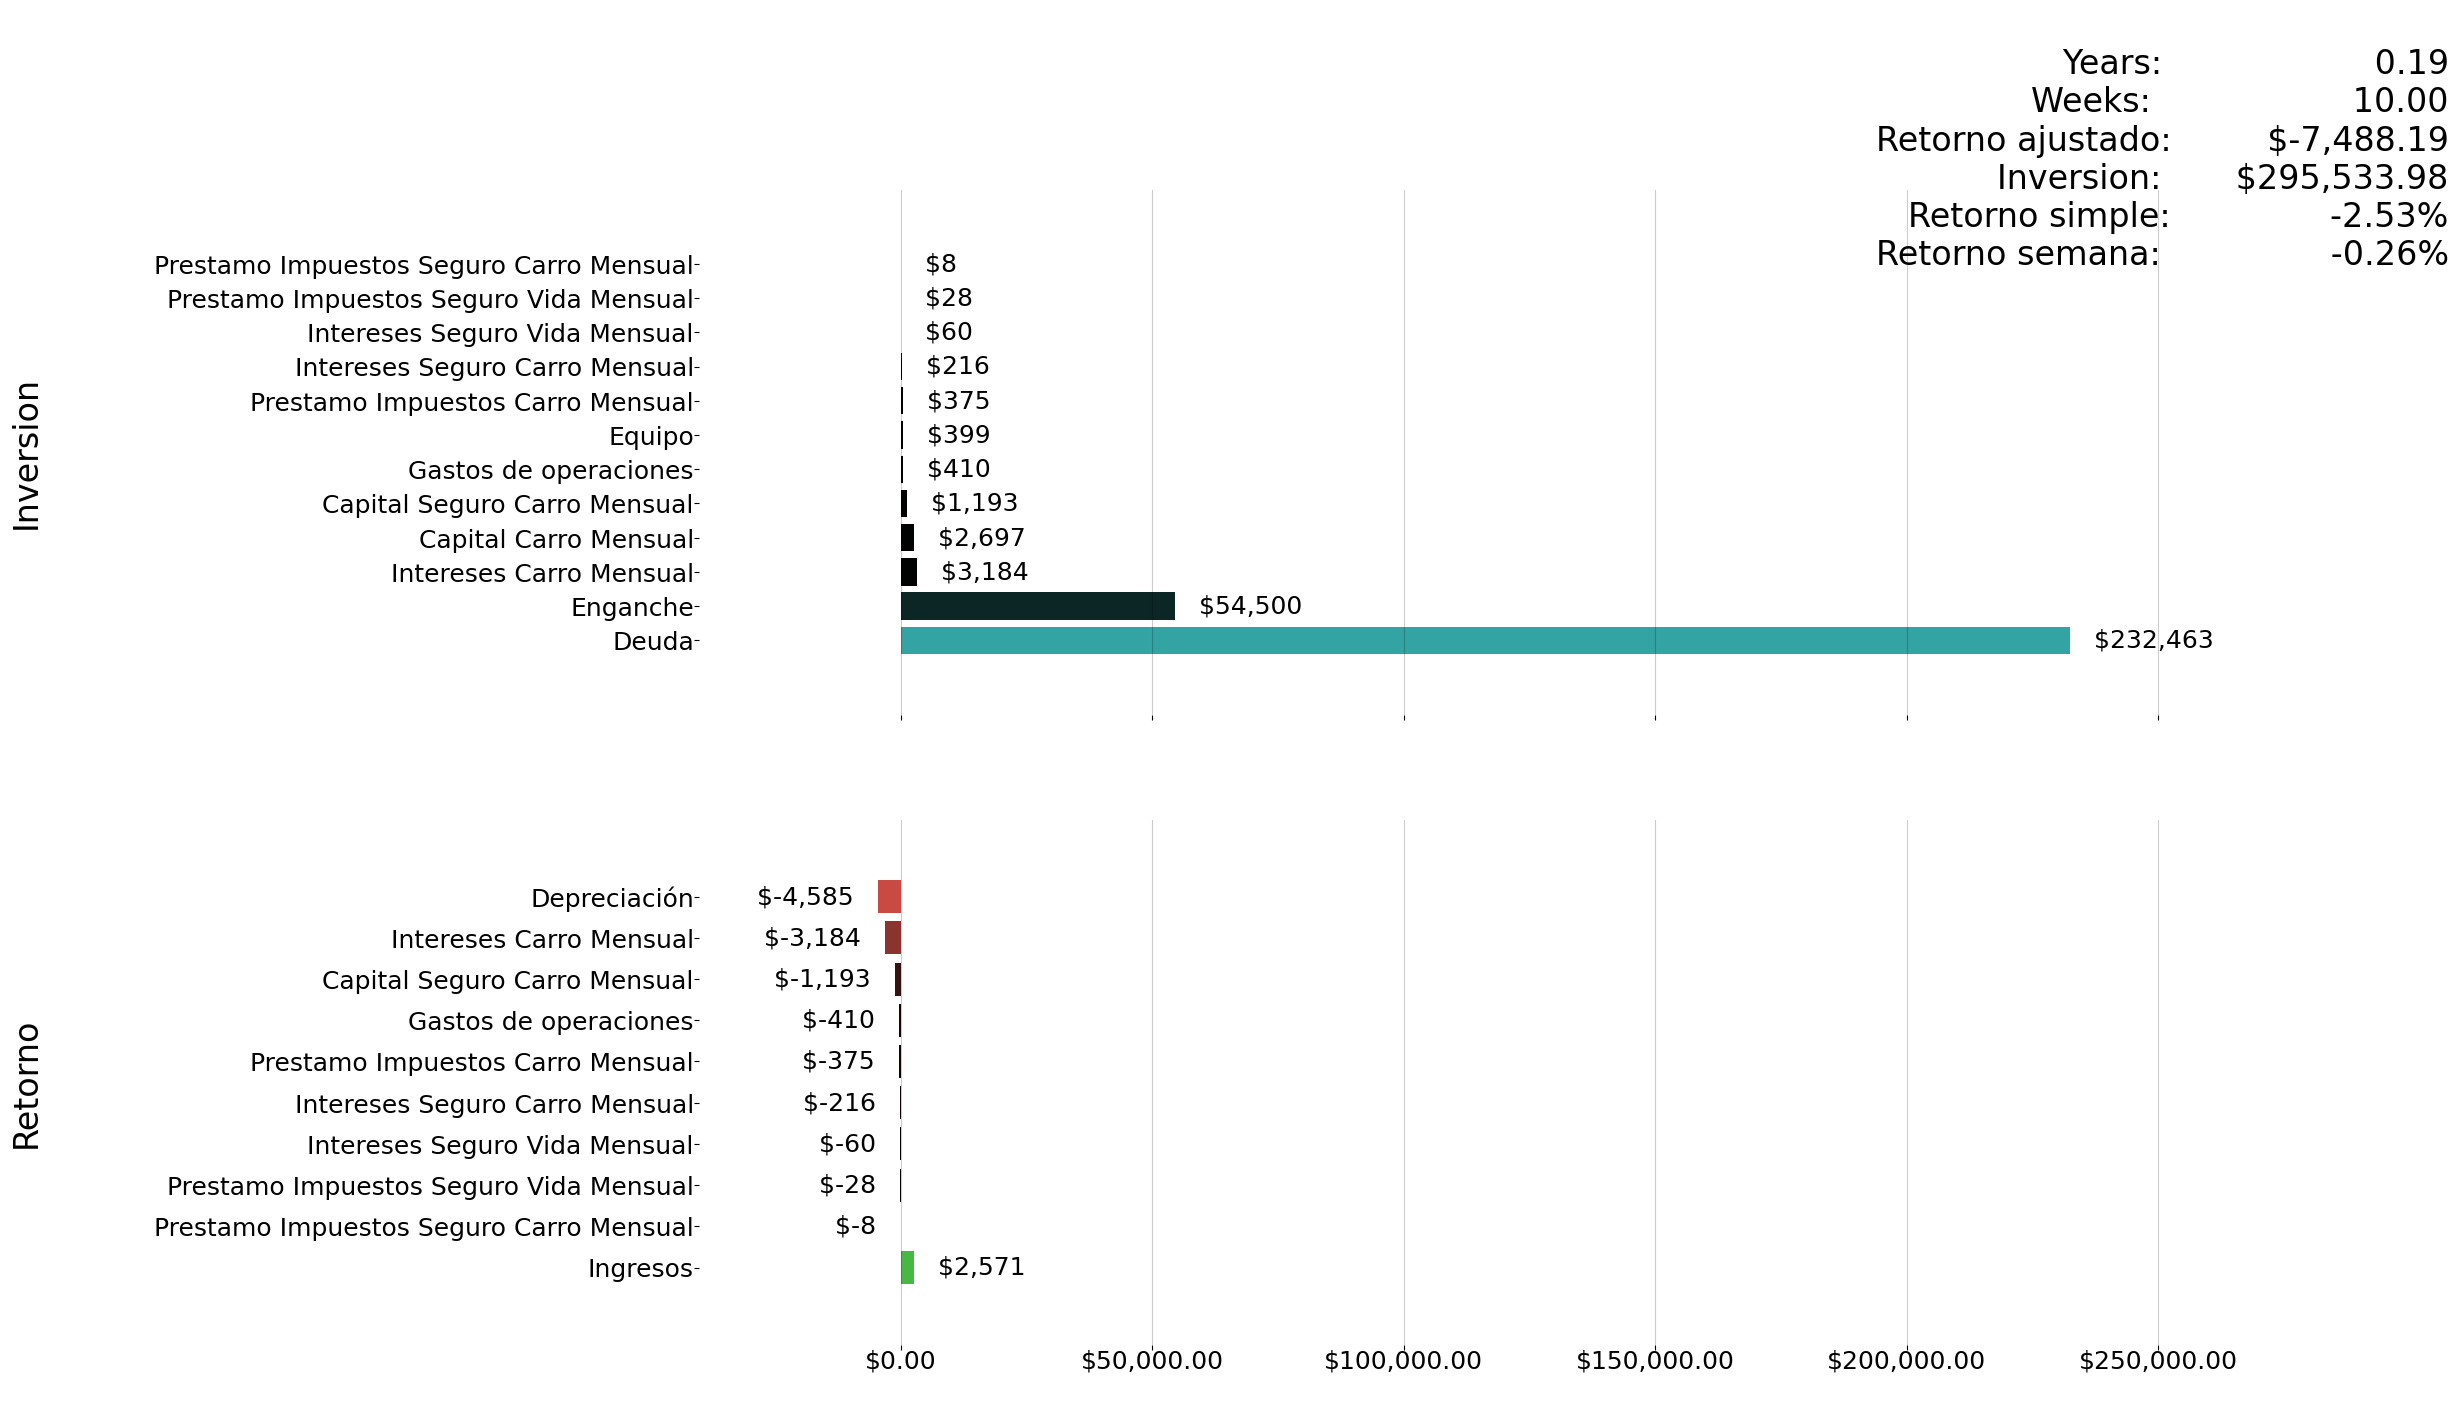

In [5]:
plot_report(
    operations=operations,
    debt=debt,
    car_depreciation=car_depreciation,
    operation_days=operation_days,
    y_ticks_map=y_ticks_map,
)